In [17]:
# ! pip install -q kaggle
# from google.colab import files
# files.upload()
# ! mkdir ~/.kaggle 
# ! cp kaggle.json ~/.kaggle/
# ! chmod 600 ~/.kaggle/kaggle.json
# !kaggle datasets download -d mlg-ulb/creditcardfraud
# !unzip creditcardfraud.zip

In [18]:
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score,roc_curve,precision_score,recall_score,roc_auc_score,make_scorer
from matplotlib.colors import Normalize
import pandas as pd
from pandas.core.frame import DataFrame 
import numpy as np 
from matplotlib import pyplot as plt 
import seaborn as sns
from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE, ADASYN,RandomOverSampler,BorderlineSMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

In [19]:
def metric(y_test,y_pred):
    cm=confusion_matrix(y_test, y_pred)
    tp=cm[1][1] #vrai positifs 
    tn=cm[0][0] #vrai negatifs
    fp=cm[0][1] #faux positifs
    fn=cm[1][0] #faux negatifs
    score=(2*((tp+tn)/y_test.size) + 5*(tp/(fn+tp)))/7 #(2*accuracy + 5*rappel)/7
#     print(f"score : {score} soit {score* 100:.2f}%")
    return float(score)

In [20]:
def reg_log_opti(X_tr,y_tr,X_ts,y_ts):
    logreg = LogisticRegression()
    # Hyperparameters
    grid = {'C':[0.001, 0.01, 0.1, 1, 10, 100, 1000],'penalty':['l1','l2']}
    # KFold pour la validation croisé du modèle
    cv = KFold(n_splits=5,random_state=None,shuffle=False)
    #Scorer
    mp_score=make_scorer(metric,greater_is_better=True)
    #GRID SEARCH pour le test des différents hyperparamètres
    log_clf=GridSearchCV(logreg, grid, cv=cv, n_jobs=-1, scoring='recall')
    log_clf.fit(X_tr,y_tr)
    print("les meilleurs hyperparamètres pour la regression logistique sont :{}".format(log_clf.best_params_))
    y_pred = log_clf.predict(X_ts)
    print('Precision : {0:0.5f}'.format(precision_score(y_ts , y_pred)))
    print('Recall : {0:0.5f}'.format(recall_score(y_ts , y_pred)))
    print('F1 : {0:0.5f}'.format(f1_score(y_ts , y_pred)))
    print('roc_auc_score : {0:0.5f}'.format(roc_auc_score(y_ts , y_pred)))
    print('metrique personnalisée (MP): {} '.format(metric(y_ts,y_pred)))
    print(f"\\\\Matrice de confusion ///:- \n {confusion_matrix(y_ts, y_pred)}")

    sns.heatmap(pd.DataFrame(confusion_matrix(y_ts, y_pred)), annot=True, annot_kws={"size": 25}, cmap="winter" ,fmt='g')
    plt.title('Matrice de confusion', y=1.1, fontsize = 22)
    plt.xlabel('Prédit',fontsize = 18)
    plt.ylabel('Réel',fontsize = 18)
    plt.show()

********** reg_log_opti APRES RUS **********


d:\Users\Asus\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:925: UserWarning: One or more of the test scores are non-finite: [       nan 0.48510224        nan 0.5183382         nan 0.53237585
        nan 0.53622201        nan 0.53493995        nan 0.53622201
        nan 0.53622201]
  category=UserWarning


les meilleurs hyperparamètres pour la regression logistique sont :{'C': 1, 'penalty': 'l2'}
Precision : 0.04856
Recall : 0.95050
F1 : 0.09240
roc_auc_score : 0.95871
metrique personnalisée (MP): 0.9551793803626101 
\\Matrice de confusion ///:- 
 [[54980  1881]
 [    5    96]]


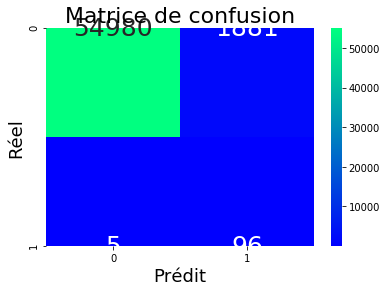

********** reg_log_opti APRES ROS **********


d:\Users\Asus\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:925: UserWarning: One or more of the test scores are non-finite: [       nan 0.90714804        nan 0.91029809        nan 0.91029809
        nan 0.91029809        nan 0.91029809        nan 0.91029809
        nan 0.91029809]
  category=UserWarning


les meilleurs hyperparamètres pour la regression logistique sont :{'C': 0.01, 'penalty': 'l2'}
Precision : 0.06904
Recall : 0.94059
F1 : 0.12864
roc_auc_score : 0.95903
metrique personnalisée (MP): 0.9511117538494483 
\\Matrice de confusion ///:- 
 [[55580  1281]
 [    6    95]]


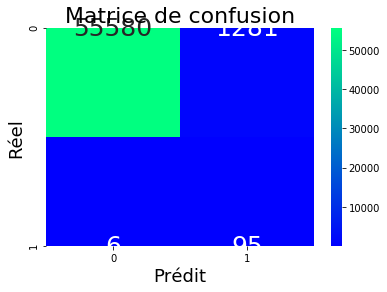

********** reg_log_opti APRES SMOTE **********


d:\Users\Asus\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:925: UserWarning: One or more of the test scores are non-finite: [       nan 0.90244506        nan 0.90655197        nan 0.90719567
        nan 0.90733009        nan 0.90735436        nan 0.90734994
        nan 0.90734994]
  category=UserWarning


les meilleurs hyperparamètres pour la regression logistique sont :{'C': 10, 'penalty': 'l2'}
Precision : 0.06234
Recall : 0.94059
F1 : 0.11692
roc_auc_score : 0.95773
metrique personnalisée (MP): 0.9503694043131661 
\\Matrice de confusion ///:- 
 [[55432  1429]
 [    6    95]]


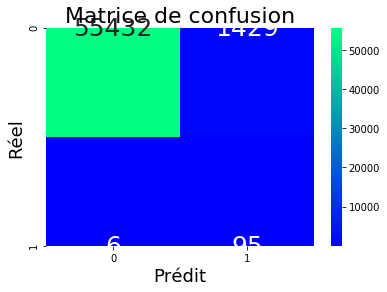

********** reg_log_opti APRES ADASYN SMOTE **********


d:\Users\Asus\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:925: UserWarning: One or more of the test scores are non-finite: [       nan 0.82609495        nan 0.83129243        nan 0.83236035
        nan 0.83097363        nan 0.83092093        nan 0.83092313
        nan 0.83091871]
  category=UserWarning


les meilleurs hyperparamètres pour la regression logistique sont :{'C': 0.1, 'penalty': 'l2'}
Precision : 0.01796
Recall : 0.97030
F1 : 0.03526
roc_auc_score : 0.93802
metrique personnalisée (MP): 0.9518834537052345 
\\Matrice de confusion ///:- 
 [[51501  5360]
 [    3    98]]


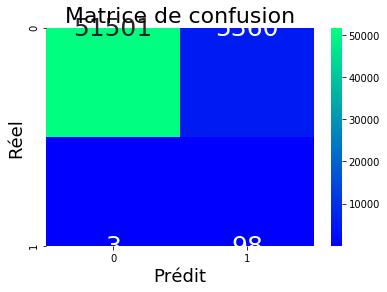

********** reg_log_opti APRES BORDERLINE SMOTE **********


d:\Users\Asus\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:925: UserWarning: One or more of the test scores are non-finite: [       nan 0.93535923        nan 0.93044566        nan 0.92949514
        nan 0.9295326         nan 0.9295348         nan 0.92822343
        nan 0.92822343]
  category=UserWarning


les meilleurs hyperparamètres pour la regression logistique sont :{'C': 0.001, 'penalty': 'l2'}
Precision : 0.10422
Recall : 0.88119
F1 : 0.18639
roc_auc_score : 0.93387
metrique personnalisée (MP): 0.9112370355144329 
\\Matrice de confusion ///:- 
 [[56096   765]
 [   12    89]]


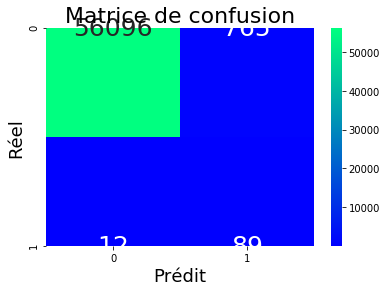

In [22]:
df = pd.read_csv('creditcard.csv').astype(np.float32)
Sc=StandardScaler()
Amount=df["Amount"].values
df["Amount"]=Sc.fit_transform(Amount.reshape(-1,1))
Time=df["Time"].values
df["Time"]=Sc.fit_transform(Time.reshape(-1,1))
x = df.drop('Class', axis=1)
y = df['Class']

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)
#ré-echantillonnage des données d'apprentissage 
rus=RandomUnderSampler() #SOUS-ECHANTILLONNAGE ALEATOIRE
X_train_rus, y_train_rus = rus.fit_resample(X_train, Y_train)

ros=RandomOverSampler() #SUR-ECHANTILLONNAGE ALEATOIRE
X_train_ros, y_train_ros = ros.fit_resample(X_train, Y_train)

smt=SMOTE() #SMOTE
X_train_smt, y_train_smt = smt.fit_resample(X_train, Y_train)

ada=ADASYN() #ADASYN-SMOTE
X_train_ada, y_train_ada = ada.fit_resample(X_train, Y_train)

Bl=BorderlineSMOTE() #BORDERLINE-SMOTE
X_train_Bl, y_train_Bl = Bl.fit_resample(X_train, Y_train)

print("*"*10,"reg_log_opti APRES RUS","*"*10)
reg_log_opti(X_train_rus,y_train_rus,X_test,Y_test)
print("*"*10,"reg_log_opti APRES ROS","*"*10)
reg_log_opti(X_train_ros,y_train_ros,X_test,Y_test)
print("*"*10,"reg_log_opti APRES SMOTE","*"*10)
reg_log_opti(X_train_smt,y_train_smt,X_test,Y_test)
print("*"*10,"reg_log_opti APRES ADASYN SMOTE","*"*10)
reg_log_opti(X_train_ada,y_train_ada,X_test,Y_test)
print("*"*10,"reg_log_opti APRES BORDERLINE SMOTE","*"*10)
reg_log_opti(X_train_Bl,y_train_Bl,X_test,Y_test)